In [79]:
import GradRam as GR

import sys
import cv2
import os

import random
import numpy as np
import keras
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Model
from keras.models import model_from_json

import keras.backend as K

### 1. run Grad-RAM

In [2]:
from keras.models import load_model
model = load_model('20190715-ca357f28-a6df-11e9-b8b2-acde48001122_vgg16.h5')
loaded_model=GR.flatten_model(model)

In [3]:
img_path1="/Users/slaw/AnacondaProjects/198. Explaining Visual Models/scenic/0/"
img_path5="/Users/slaw/AnacondaProjects/198. Explaining Visual Models/scenic/5/"
img_path10="/Users/slaw/AnacondaProjects/198. Explaining Visual Models/scenic/10/"
allfiles1=os.listdir(img_path1)
scenicImages1=[filename for filename in allfiles1 if  filename[-4:] in [".jpg",".JPG",".png",".PNG"]]
allfiles5=os.listdir(img_path5)
scenicImages5=[filename for filename in allfiles5 if  filename[-4:] in [".jpg",".JPG",".png",".PNG"]]
allfiles10=os.listdir(img_path10)
scenicImages10=[filename for filename in allfiles10 if  filename[-4:] in [".jpg",".JPG",".png",".PNG"]]

In [67]:
link = random.choice(scenicImages1)
path = img_path1+link

In [68]:
link = random.choice(scenicImages5)
path = img_path5+link

In [69]:
link = random.choice(scenicImages10)
path = img_path10+link

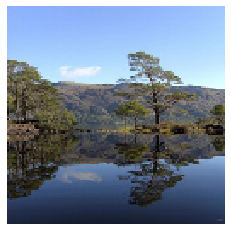

In [70]:
img = GR.load_img(path)
heatmap = GR.GradRAM(img,loaded_model)
img=(img-np.min(img))/(np.max(img)-np.min(img))
plt.axis('off')
plt.imshow((img.squeeze()))

[[6.7638936]]


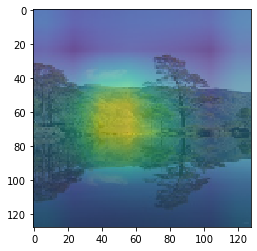

In [71]:
print (loaded_model.predict(img))
plt.imshow((img.squeeze()))
plt.imshow(heatmap,alpha=0.6)

[[6.7638936]]


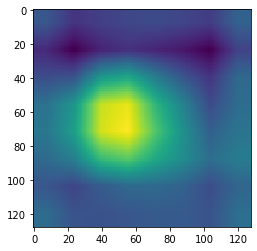

In [72]:
plt.imshow((img.squeeze()))
print (loaded_model.predict(img))
plt.imshow(heatmap,alpha=1)

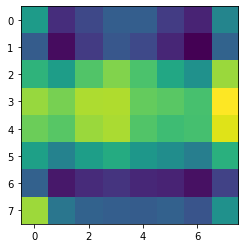

In [73]:
reg_output = loaded_model.output[:,:]
last_conv_layer = loaded_model.get_layer("block5_conv3")
grads = K.gradients(reg_output,last_conv_layer.get_output_at(1))[0]
pooled_grads=K.mean(grads, axis=(0,1,2))
iterate = K.function([loaded_model.input],[pooled_grads,last_conv_layer.get_output_at(1)[0]])
pooled_grads_value, conv_layer_output_value = iterate([img])
plt.imshow(np.mean(conv_layer_output_value,axis=2))

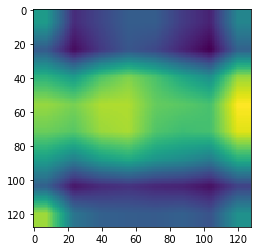

In [74]:
heatmap = np.mean(conv_layer_output_value,axis=-1)
heatmap = np.maximum(heatmap,0)
heatmap/=np.max(heatmap)
heatmap = cv2.resize(heatmap, (128,128))
plt.imshow(heatmap)

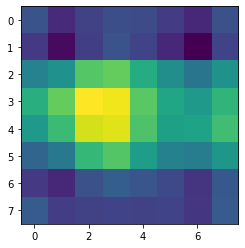

In [75]:
for i in range(512):
    conv_layer_output_value[:,:,i]*=pooled_grads_value[i]
plt.imshow(np.mean(conv_layer_output_value,axis=2))

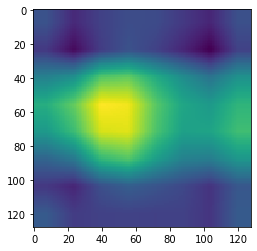

In [77]:
#heatmap2 = np.mean(conv_layer_output_value,axis=-1)
heatmap2 = np.sum(conv_layer_output_value, axis=-1)
heatmap2 = np.maximum(heatmap2,0)
heatmap2/=np.max(heatmap2)
heatmap2 = cv2.resize(heatmap2, (128,128))
plt.imshow(heatmap2)

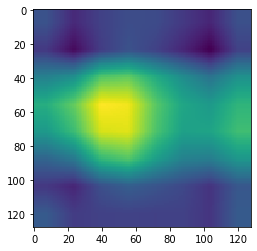

In [78]:
heatmap2 = np.mean(conv_layer_output_value,axis=-1)
#heatmap2 = np.sum(conv_layer_output_value, axis=-1)
heatmap2 = np.maximum(heatmap2,0)
heatmap2/=np.max(heatmap2)
heatmap2 = cv2.resize(heatmap2, (128,128))
plt.imshow(heatmap2)